# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


In [202]:
# For network architecture visualization, other options are totally fine
# from tensorflow.keras.utils import plot_model
# from torchviz import make_dot

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

train = train.drop(columns=['split'])
test = test.drop(columns=['split'])

print(train.shape, val.shape, test.shape)

(500, 3) (100, 3) (500, 3)


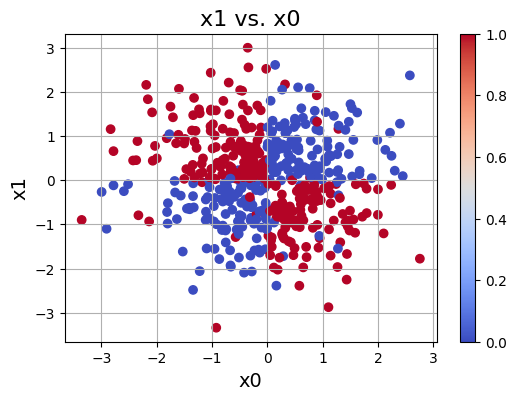

In [205]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()


In [206]:
# cosine scheduler from https://d2l.ai/chapter_optimization/lr-scheduler.html, linked to from the assignment
import math

class CosineScheduler:
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
               warmup_steps=0, warmup_begin_lr=0):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps

    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) \
                       * float(epoch) / float(self.warmup_steps)
        return self.warmup_begin_lr + increase

    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch)
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + (
                self.base_lr_orig - self.final_lr) * (1 + math.cos(
                math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr

In [207]:
import matplotlib.pyplot as plt

Test Loss:  0.2755
Test Accuracy:  0.928


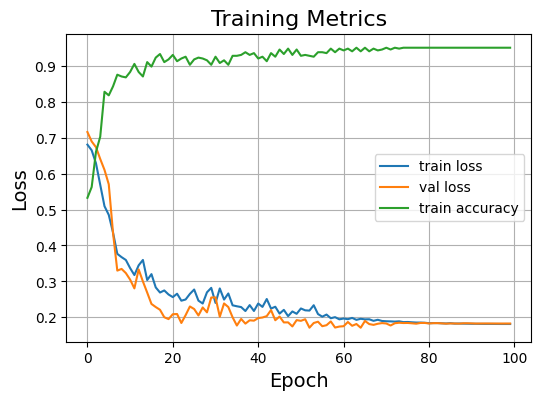

In [208]:
import pandas as pd
import numpy as np
import random
import os
np.random.seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)

import tensorflow as tf
tf.random.set_seed(42)

import keras
from keras import layers
from keras.callbacks import LearningRateScheduler
keras.utils.set_random_seed(42)


X_train = train[['x0', 'x1']]
y_train = train['y']

X_test = test[['x0', 'x1']]
y_test = test['y']

model = keras.Sequential(
    name='xor',
    layers= 
    [
        layers.Input(shape=(2,)),
        layers.Dense(8, activation='relu', name="dense1"),
        layers.Dense(8, activation='relu', name="dense2"),
        layers.Dense(8, activation='relu', name="dense3"),
        layers.Dense(1, activation='sigmoid', name="output")
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 100

cosine_scheduler = (CosineScheduler(epochs, warmup_steps=round(epochs/10), base_lr=0.1, final_lr=0.0001))

scheduler = LearningRateScheduler(cosine_scheduler)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2, verbose=0, callbacks=[scheduler])

results = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy = results

print("Test Loss: ", round(loss, 4))
print("Test Accuracy: ", round(accuracy, 4))


plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.grid(True)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Metrics', fontsize=16)
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


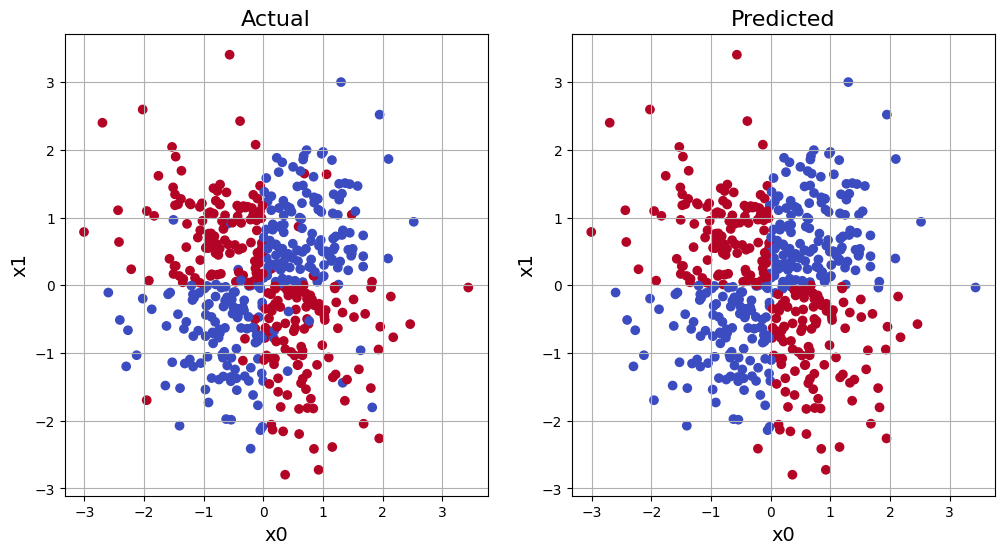

In [209]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test['x0'], X_test['x1'], c=y_test, cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('Actual', fontsize=16)

plt.subplot(1, 2, 2)
plt.scatter(X_test['x0'], X_test['x1'], c=predictions, cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('Predicted', fontsize=16)

plt.show()

3. **Discussion**:
   - **How did you achieve the reproducibility of the results?**  
   Attempted to solve the problem with various learning rates, hidden layers and amount of nodes in each layer. The reproducibility was achieved by using the same data each time for training, validation and testing, as well as setting random seeds.
   - **Visualize the network's architecture and decision boundary.**  


The model is briefly described with the visualization and summary below, having three hidden layers with 8 nodes each, totaling 177 trainable parameters.

In [210]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [211]:
model.summary()

Model: "xor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                  │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

- **Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.**  
I used Adam optimizer with learning rate scheduling and warmup. The learning rate scheduler was a cosine learning rate scheduler. The reason for using this was an understanding that this is a default optimizer which is commonly used, and is SOTA. SGD is another commonly used optimizer, which is useful for large datasets. SGD (Stochastic gradient descent) uses mini-batches of the dataset for gradient descent to speed up the learning, resulting in the training process not needing to use the entire dataset for gradient descent (very slow for large datasets and NN).  
Adam on the other hand is an optimizer which is used to "boost through" sadle points in the loss function by using momentum. This is done by calculating the moving average of the gradients instead of the gradients themselves.
- **Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?**  
The learning rate scheduler seems to improve performance by converging faster with fewer epochs, reaching the desired results. The model was trained and tested without shceduling, and needed more epochs to get the same results. For 100 epochs without scheduling, the accuracy was approximately 0.85 for the test set, and the model is not done training (looking at the curve), since loss is decreasing and accuracy increasing. The learnign rate scheduler is shown below.

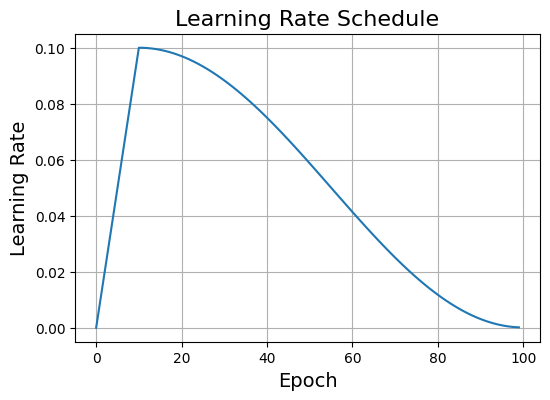

In [212]:
plt.figure(figsize=(6, 4))
plt.plot([cosine_scheduler(i) for i in range(epochs)])
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Learning Rate', fontsize=14)
plt.title('Learning Rate Schedule', fontsize=16)
plt.grid(True)

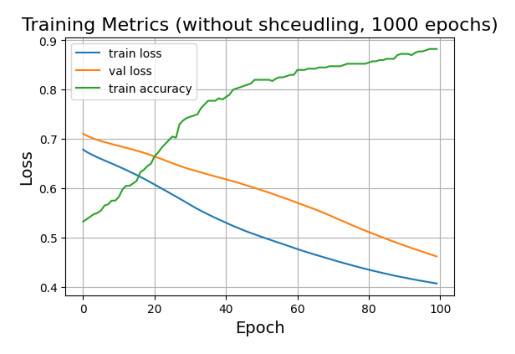

In [213]:
plt.imshow(plt.imread("wout_adam_100.png"))
plt.axis('off')
plt.show()

After 1000 epochs without learning rate scheduler, the result is shown below. It reached 0.92 accuracy on the testing dataset. It probably could have worked well with fewer epochs, as the curve is quite flat. The point, however, is to show that the training needed far more epochs without scheudling.

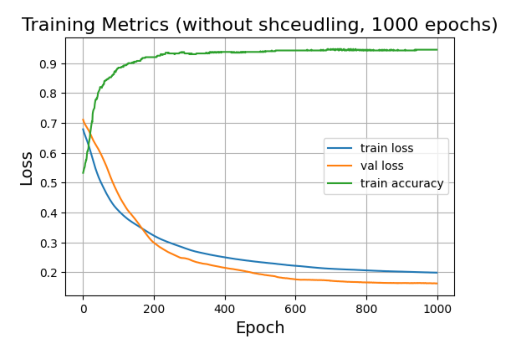

In [214]:
plt.imshow(plt.imread("wout_adam_1000.png"))
plt.axis('off')
plt.show()

   - **Conduct an ablation study of each architectural and optimization choice concerning test accuracy.**

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


In [215]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

In [216]:
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [217]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


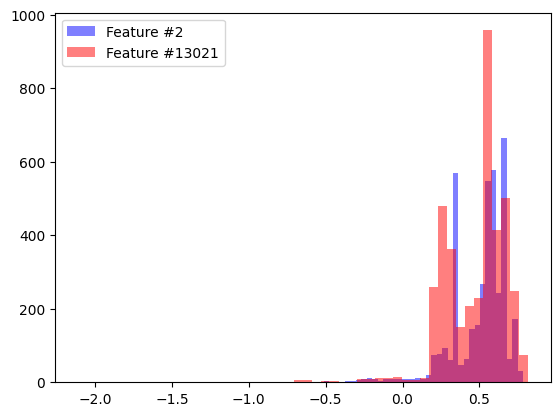

In [218]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()

In [219]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


### 2D PCA

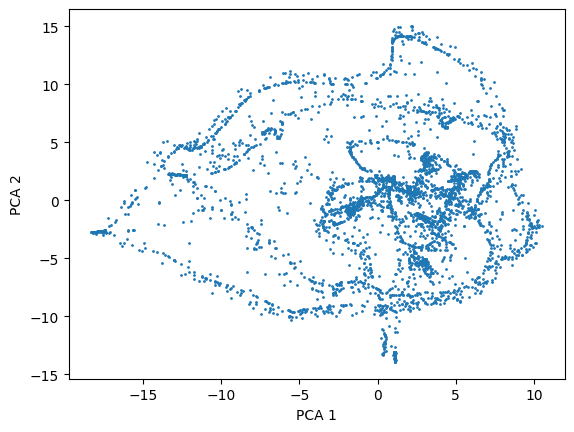

In [220]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = data.drop(columns='ID').values
X_2d = pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 3D PCA

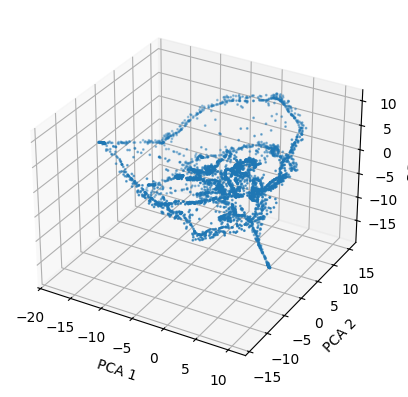

In [221]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X = data.drop(columns='ID').values
X_3d = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], s=1)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.ion()
plt.show()

Clusters found:  3
Cluster  0  has  3045  data points
Cluster  1  has  896  data points
Cluster  -1  has  0  data points


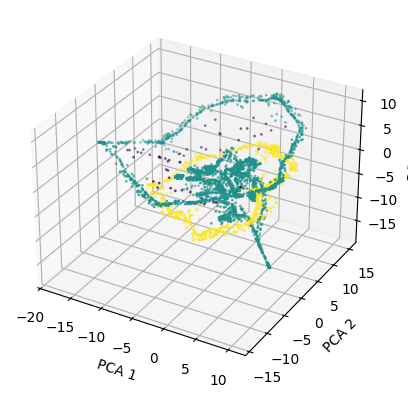

In [222]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.6, min_samples=10)
dbscan.fit(X_3d)

print("Clusters found: ", len(set(dbscan.labels_)))
for i in range(len(set(dbscan.labels_))):
    print("Cluster ", list(set(dbscan.labels_))[i], " has ", sum(dbscan.labels_ == i), " data points")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=dbscan.labels_, s=1)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

In [223]:
def create_submission(data, labels, filename):
    submission = pd.DataFrame()
    submission['ID'] = data[['ID']]
    submission['cluster'] = labels
    submission.to_csv(filename, index=False)

## t-SNE 2D

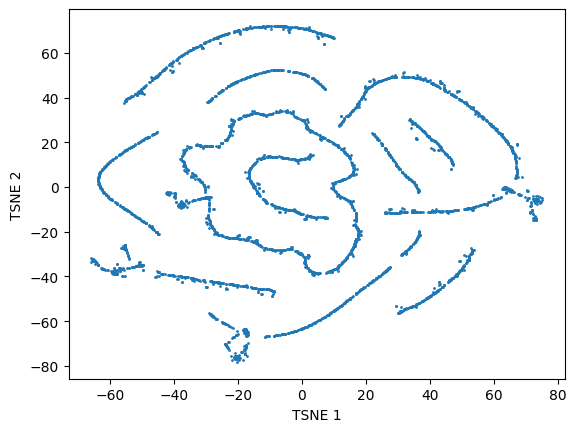

In [224]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)
X_tsne_2d = tsne.fit_transform(X)

plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], s=1)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

## t-SNE 3D

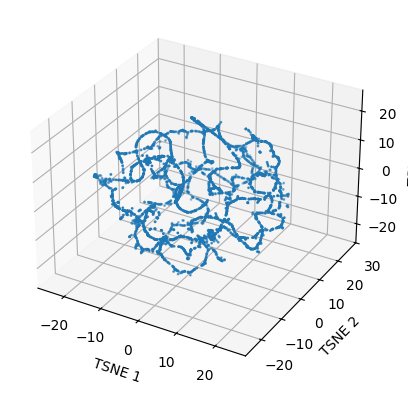

In [225]:
tsne = TSNE(n_components=3, perplexity=30)
X_tsne_3d = tsne.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], s=1)
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
plt.show()

## CLustering t-SNE 2D

Clusters found:  15


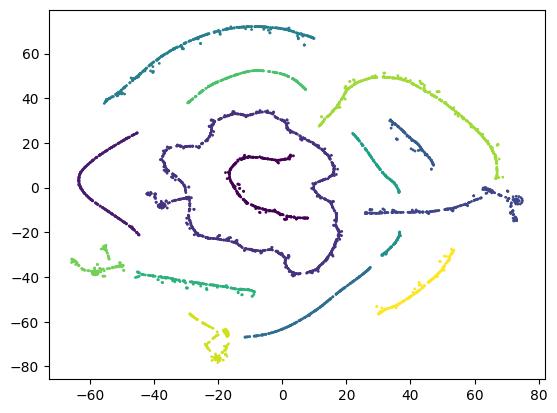

In [226]:
dbscan = DBSCAN(eps=4, min_samples=5)
dbscan.fit(X_tsne_2d)

print("Clusters found: ", len(set(dbscan.labels_)))

plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=dbscan.labels_, s=1)
plt.show()

## Clustering t-SNE 3D (correct solution)

In [227]:
import matplotlib.pyplot as plt

Clusters found:  4


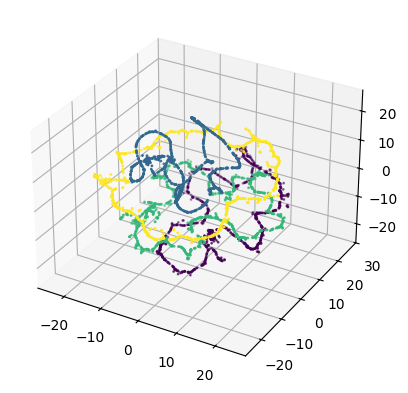

In [228]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X_tsne_3d)

print("Clusters found: ", len(set(dbscan.labels_)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=dbscan.labels_, s=1)
plt.show()


The above plot was the correct solution, and has some clear clusterings of rings/loops around in a circle. It is even clearer in the 3d plot. 

In [229]:
create_submission(data, dbscan.labels_, 'submission.csv')

- **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.

I attempted both PCA and t-SNE for dimensionality reduction / feature extraction, and both seemed promising. For the clustering purpose, t-SNE showed clearer clusters, whereas PCA looke to have some other structure (like a flower or something). PCA fits the axes to the dataset byt finding the axes with the most variance. Den finner så mange akser / komponenter som man spesifiserer. Disse er da ortogonale / vinkelrette på hverandre. 

SNE / t-SNE bruker sannsynlighet for å redusere dimensjonaliteten til en spredning av punkter. Denne dimensjonaliteten er også oppgitt som en hyperparameter. SNE beregner sannsynligheten for at punkter er naboer i det opprinnelige rommet. Dette blir gjrot med en sannsynlighetsfordeling, som for SNE er en gauss. Punktene flyttes så ned til et mindre rom (antall dimensjoner), plasseres tilfeldig, før de flyttes rundt for å tilpasse seg den opprinnelige sannsynlighetsfordelingen så bra som mulig. Forskjellen på t-SNE og SNE er at førstnevnte bruker en t-fordeling heller enn gauss.

UMAP is a newer technique which has better performance and captures the global structure of data better (separating clusters from each other).

- **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.

I used DBSCAN for clustering, and this was decided by looking at the data. I will explain why after explaining the two clustering algorithms.

Kmeans clustering measures distance between points and clusters them based on this distance. It places centroids around and appoints each point to the closest centroid. This process is continued by moving the centroids to the middle and reappointing the points to the centroids. This clustering method is effective where similar datapoints are close to each other by having a small distance. It uses a hyperparameter of k, which is the amount of clusters. It is therefore very sensitive to this parameter, which is a disadvantage when not knowing enough about the dataset / how to logically cluster it.

DBSCAN measures similrity by density of datapoints. It is better at finding similarities / patterns in the data, not just closely connected clusters. It works by finding core points, and finding points within a specified distance of this "cluster". This is then expanded until no more clusters are found. The distance and amount of points in proximity needed to be a core point are two important hyperparameters for this method. It is also very sensitive to these two.

I used DBSCAN since the data seemed to have similarities in densities, like rings around a circle (finding the rings around saturn). Therefore, finding the density clusters was intuitive, as kmeans would find clusters consisting of points from different patterns.


- **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.


In [243]:
submission = pd.read_csv('submission.csv')
data['cluster'] = submission['cluster']

clusters = set(data['cluster'])
for cluster in clusters:
    print("Cluster ", cluster, " has ", sum(data['cluster'] == cluster), " data points")


Cluster  0  has  1000  data points
Cluster  1  has  1000  data points
Cluster  2  has  1000  data points
Cluster  3  has  1000  data points


- **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
- **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [230]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [231]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [232]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [233]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5